In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read the data

In [ ]:
data = pd.read_csv('my_file.csv')
data.head()

,Serial Number,Name,Gender,Age,Years of Exp,Domain
0,1,Vikram,Male,34,7,Automotive
1,2,Leena,Female,32,5,Healthcare
2,3,Joyce,Female,45,17,Pharma
3,4,Fayyaz,Male,31,4,Logistics
4,5,Anish,Male,56,20,Ecommerce


### Write the data

In [ ]:
data.drop(['Years of Exp','Domain'], axis = 1, inplace= True)
data

,Serial Number,Name,Gender,Age
0,1,Vikram,Male,34
1,2,Leena,Female,32
2,3,Joyce,Female,45
3,4,Fayyaz,Male,31
4,5,Anish,Male,56
5,6,Gayatri,Female,30
6,7,Nitheesh,Male,28
7,8,Jogi,Male,29
8,9,Kiran,Male,40
9,10,Jacqueline,Female,35


In [ ]:
data.to_csv('my_file_1.csv', index = False)

### Data Exploration

In [ ]:
data.shape

(10, 4)

It says there are 10 rows or observations and 6 columns or variables

In [ ]:
data.dtypes

Serial Number     int64
Name             object
Gender           object
Age               int64
dtype: object

It lists out the data type of each column

In [ ]:
data.iloc[3:7,2:4]

,Gender,Age
3,Male,31
4,Male,56
5,Female,30
6,Male,28


Slicing of the dataframe to obtain a subset of a dataframe

In [ ]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
data['Domain'].unique()

array(['Automotive', 'Healthcare', 'Pharma', 'Logistics', 'Ecommerce',
       'Banking', 'Finance', 'Defence', 'Administration', 'Tourism'],
      dtype=object)

Lists out the unique values of each column

In [ ]:
data['Years of Exp'].values

array([ 7,  5, 17,  4, 20,  3,  1,  2, 10,  7])

Lists the entire series in list format

#### Mean, Median and Mode

In [ ]:
data['Age'].mean()

36.0

In [ ]:
data['Age'].median()

33.0

In [ ]:
data['Age'].mode()

0    28
1    29
2    30
3    31
4    32
5    34
6    35
7    40
8    45
9    56
dtype: int64

In [ ]:
data.columns

Index(['Serial Number', 'Name', 'Gender', 'Age', 'Years of Exp', 'Domain'], dtype='object')

### Find the Correlation

In [ ]:
data[['Age','Years of Exp']].corr()

,Age,Years of Exp
Age,1.000000,0.979767
Years of Exp,0.979767,1.000000


In [ ]:
data

,Serial Number,Name,Gender,Age,Years of Exp,Domain
0,1,Vikram,Male,34,7,Automotive
1,2,Leena,Female,32,5,Healthcare
2,3,Joyce,Female,45,17,Pharma
3,4,Fayyaz,Male,31,4,Logistics
4,5,Anish,Male,56,20,Ecommerce
5,6,Gayatri,Female,30,3,Banking
6,7,Nitheesh,Male,28,1,Finance
7,8,Jogi,Male,29,2,Defence
8,9,Kiran,Male,40,10,Administration
9,10,Jacqueline,Female,35,7,Tourism


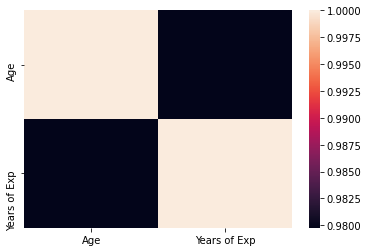

In [ ]:
sns.heatmap(data[['Age','Years of Exp']].corr());

In [ ]:
data['Salary'] = [32, 64, 21, 18, 90, 51, 34, 37, 21, 22]

In [ ]:
data

,Serial Number,Name,Gender,Age,Years of Exp,Domain,Salary
0,1,Vikram,Male,34,7,Automotive,32
1,2,Leena,Female,32,5,Healthcare,64
2,3,Joyce,Female,45,17,Pharma,21
3,4,Fayyaz,Male,31,4,Logistics,18
4,5,Anish,Male,56,20,Ecommerce,90
5,6,Gayatri,Female,30,3,Banking,51
6,7,Nitheesh,Male,28,1,Finance,34
7,8,Jogi,Male,29,2,Defence,37
8,9,Kiran,Male,40,10,Administration,21
9,10,Jacqueline,Female,35,7,Tourism,22


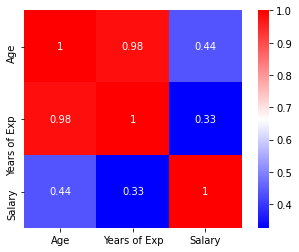

In [ ]:
sns.heatmap(data[['Age', 'Years of Exp', 'Salary']].corr(), square= True, cmap ='bwr', annot=True);

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy = 'constant', fill_value='Kritika')

In [ ]:
data = pd.DataFrame({'Name':['Leena', 'John', 'Leena', 'Karthick', np.nan],'Age':[np.nan, 28, 25, 31, 43]})
data

,Name,Age
0,Leena,NaN
1,John,28.0
2,Leena,25.0
3,Karthick,31.0
4,NaN,43.0


In [ ]:
data.isna().any()

Name    True
Age     True
dtype: bool

In [ ]:
data.dtypes

Name     object
Age     float64
dtype: object

In [ ]:
imputer.fit(data[['Name']])

SimpleImputer(fill_value='Kritika', strategy='constant')

In [ ]:
imputer.statistics_

array(['Kritika'], dtype=object)

In [ ]:
data['Name'] = imputer.transform(data[['Name']])
data

,Name,Age
0,Leena,NaN
1,John,28.0
2,Leena,25.0
3,Karthick,31.0
4,Kritika,43.0


In [ ]:
data.isna().any()

Name    False
Age      True
dtype: bool

In [ ]:
## Dropping the rows with null values

data.dropna(inplace=True)
data.isna().any()

Name    False
Age     False
dtype: bool

In [ ]:
data

,Name,Age
1,John,28.0
2,Leena,25.0
3,Karthick,31.0
4,Kritika,43.0


### Outlier Treatment

In [ ]:
from sklearn.datasets import load_diabetes

In [ ]:
diabetes_data = load_diabetes()

In [ ]:
type(diabetes_data)

sklearn.utils.Bunch

In [ ]:
print(diabetes_data.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [ ]:
print(diabetes_data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
diabetes_data['data'].shape

(442, 10)

In [ ]:
data = pd.DataFrame(diabetes_data['data'], columns=diabetes_data['feature_names'])

In [ ]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


<AxesSubplot:xlabel='age'>

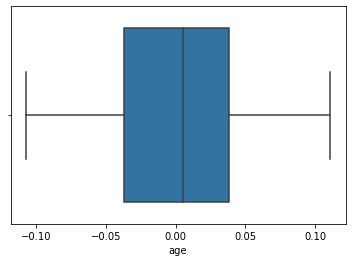

In [ ]:
sns.boxplot(data['age'])

No outliers observed in the age column

<AxesSubplot:xlabel='bmi'>

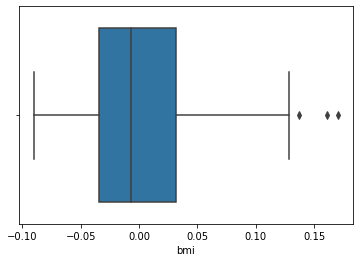

In [ ]:
sns.boxplot(data['bmi'])

Three outliers observed. Let us remove them using filter

<AxesSubplot:xlabel='bmi'>

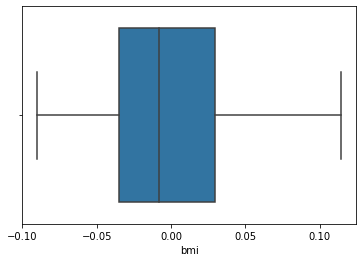

In [ ]:
filter = data['bmi'] < 0.12
data_filtered = data[filter]

sns.boxplot(data_filtered['bmi'])

### Groupby

In [ ]:
data = pd.DataFrame({'Name':['Jack', 'John', 'Leena', 'Karthick', 'John', 'Jack', 'Jack'],
                     'College':['ABC', 'ABC', 'WOM', 'XYZ', 'XYZ', 'ABC', 'ABC'],
                    'Marks':[20, 21, 24, 25, 17, 10, 15]})

data

,Name,College,Marks
0,Jack,ABC,20
1,John,ABC,21
2,Leena,WOM,24
3,Karthick,XYZ,25
4,John,XYZ,17
5,Jack,ABC,10
6,Jack,ABC,15


In [ ]:
groups = data.groupby(['Name','College'])

In [ ]:
groups.groups

{('Jack', 'ABC'): Int64Index([0, 5, 6], dtype='int64'),
 ('John', 'ABC'): Int64Index([1], dtype='int64'),
 ('John', 'XYZ'): Int64Index([4], dtype='int64'),
 ('Karthick', 'XYZ'): Int64Index([3], dtype='int64'),
 ('Leena', 'WOM'): Int64Index([2], dtype='int64')}

In [ ]:
groups.mean()

Marks
Name     College       
Jack     ABC         15
John     ABC         21
         XYZ         17
Karthick XYZ         25
Leena    WOM         24

In [ ]:
groups.max()

,Marks
Name,
Jack,20
John,21
Karthick,25
Leena,24


In [ ]:
groups.count()

,Marks
Name,
Jack,3
John,2
Karthick,1
Leena,1


### Concatenation

In [ ]:
data_1 = pd.DataFrame({'Name':['Jack', 'John', 'Leena', 'Karthick', 'John', 'Jack', 'Jack'],
                     'College':['ABC', 'ABC', 'WOM', 'XYZ', 'XYZ', 'ABC', 'ABC'],
                    'Marks':[20, 21, 24, 25, 17, 10, 15]})

data_1

,Name,College,Marks
0,Jack,ABC,20
1,John,ABC,21
2,Leena,WOM,24
3,Karthick,XYZ,25
4,John,XYZ,17
5,Jack,ABC,10
6,Jack,ABC,15


In [ ]:
data_2 = pd.DataFrame({'Grade':['A', 'A', 'A+', 'A+', 'C', 'D', 'B']})
data_2

,Grade
0,A
1,A
2,A+
3,A+
4,C
5,D
6,B


In [ ]:
data_3 = pd.DataFrame({'Name':['Jill', 'Sameer'],
                     'College':['PQR', 'LMN'],
                    'Marks':[24, 17]})

data_3

,Name,College,Marks
0,Jill,PQR,24
1,Sameer,LMN,17


In [ ]:
## set axis = 1 to concatenate along the column
pd.concat([data_1, data_2], axis = 1)

,Name,College,Marks,Grade
0,Jack,ABC,20,A
1,John,ABC,21,A
2,Leena,WOM,24,A+
3,Karthick,XYZ,25,A+
4,John,XYZ,17,C
5,Jack,ABC,10,D
6,Jack,ABC,15,B


In [ ]:
pd.concat([data_1, data_3], ignore_index=True)

,Name,College,Marks
0,Jack,ABC,20
1,John,ABC,21
2,Leena,WOM,24
3,Karthick,XYZ,25
4,John,XYZ,17
5,Jack,ABC,10
6,Jack,ABC,15
7,Jill,PQR,24
8,Sameer,LMN,17


### Merging

In [ ]:
data_1 = pd.DataFrame({'Name':['Jack', 'John', 'Leena', 'Karthick', 'John', 'Jack', 'Jack'],
                     'College':['ABC', 'ABC', 'WOM', 'XYZ', 'XYZ', 'ABC', 'ABC'],
                    'Marks':[20, 21, 24, 25, 17, 10, 15]})

data_1

NameError: ignored

In [ ]:
data_2 = pd.DataFrame({'Name':['John', 'Jack', 'Leena', 'Sameer', 'Kritika'],
                      'Genders':['Male', 'Male', 'Female', 'Male', 'Female']})

data_2

In [ ]:
pd.merge(data_1, data_2, on ='Name')

In [ ]:
pd.merge(data_1, data_2, on ='Name', how = 'left')

In [ ]:
pd.merge(data_1, data_2, on ='Name', how = 'right')

In [ ]:
pd.merge(data_1, data_2, on ='Name', how = 'outer')

In [ ]:
data_3 = pd.DataFrame({'Names':['John', 'Jack', 'Leena', 'Sameer', 'Kritika'],
                      'Genders':['Male', 'Male', 'Female', 'Male', 'Female']})

data_3

In [ ]:
# pd.merge(data_1, data_3, on='Name')
data_1.set_index('Name', inplace=True)
data_1

In [ ]:
data_3.set_index('Names', inplace=True)
data_3

In [ ]:
data_1.join(data_3).reset_index()

Simple Imputer

	https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=imputer#sklearn.impute.SimpleImputer


Task :

	Assignment on salaries.csv
	Assignment on mtcars.csv

	Problem statement is in the ppt's
	The dataset is in the drive under 21st sept